In [258]:
import pandas as pd

In [259]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [260]:
plt.rcParams["font.family"] = 'NanumGothicCoding'
matplotlib.rc("axes", unicode_minus = False)

In [261]:
def get_classifier_eval(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))
    print('f1-score: {0:.4f}'.format(f1score))

In [422]:
df = pd.read_csv('df_Cluster.csv')

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98881 entries, 0 to 98880
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TARGET                  98881 non-null  int64  
 1   BNK_LNIF_CNT            98881 non-null  int64  
 2   CPT_LNIF_CNT            98881 non-null  int64  
 3   SPART_LNIF_CNT          98881 non-null  int64  
 4   ECT_LNIF_CNT            98881 non-null  int64  
 5   TOT_LNIF_AMT            98881 non-null  int64  
 6   TOT_CLIF_AMT            98881 non-null  int64  
 7   BNK_LNIF_AMT            98881 non-null  int64  
 8   CPT_LNIF_AMT            98881 non-null  int64  
 9   CRDT_OCCR_MDIF          98881 non-null  int64  
 10  SPTCT_OCCR_MDIF         98881 non-null  int64  
 11  CRDT_CARD_CNT           98881 non-null  int64  
 12  CTCD_OCCR_MDIF          98881 non-null  int64  
 13  CB_GUIF_CNT             98881 non-null  int64  
 14  CB_GUIF_AMT             98881 non-null

In [424]:
df['Cluster'].value_counts()

0    91688
1     7193
Name: Cluster, dtype: int64

In [425]:
df['STRT_CRDT_GRAD_row'] = 0
df.loc[(df['STRT_CRDT_GRAD'] > 5) & (df['STRT_CRDT_GRAD'] == 0), 'STRT_CRDT_GRAD_row'] = 1

In [426]:
df['LTST_CRDT_GRAD_row'] = 0
df.loc[(df['LTST_CRDT_GRAD'] > 5) & (df['LTST_CRDT_GRAD'] == 0), 'LTST_CRDT_GRAD_row'] = 1

In [427]:
ob_col = ['TARGET', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT', 'ECT_LNIF_CNT', 'CRDT_CARD_CNT', 'CB_GUIF_CNT', 'OCCP_NAME_G', 'ACTL_FMLY_NUM', 'CUST_FMLY_NUM',
'STRT_CRDT_GRAD_row', 'LTST_CRDT_GRAD_row', 'CNTT_LAMT_CNT', 'LT1Y_CTLT_CNT', 'AGE']

In [428]:
df[ob_col]=df[ob_col].astype('str')

In [429]:
df.drop('MIN_CNTT_DATE',axis=1,inplace=True)

In [430]:
df.drop('STRT_CRDT_GRAD',axis=1,inplace=True)
df.drop('LTST_CRDT_GRAD',axis=1,inplace=True)

In [431]:
df.drop('TOT_CRLN_AMT',axis=1,inplace=True)
df.drop('CRDT_LOAN_CNT',axis=1,inplace=True)

In [432]:
df_x = df.drop('Cluster',axis=1)
df_y = df['Cluster']

In [433]:
numeric_df = df_x.select_dtypes(exclude=object)
object_df = df_x.select_dtypes(include=object)

In [434]:
df_raw_dummy = pd.get_dummies(object_df)
df_raw_dummy

,TARGET_0,TARGET_1,BNK_LNIF_CNT_0,BNK_LNIF_CNT_1,BNK_LNIF_CNT_2,BNK_LNIF_CNT_3,BNK_LNIF_CNT_4,BNK_LNIF_CNT_5,CPT_LNIF_CNT_0,CPT_LNIF_CNT_1,...,AGE_35,AGE_40,AGE_45,AGE_50,AGE_55,AGE_60,AGE_65,AGE_70,STRT_CRDT_GRAD_row_0,LTST_CRDT_GRAD_row_0
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
1,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
2,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98876,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
98877,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
98878,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
98879,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1


In [435]:
df_x=numeric_df.join(df_raw_dummy)

In [436]:
df_x

,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CTCD_OCCR_MDIF,CB_GUIF_AMT,LAST_CHLD_AGE,MATE_JOB_INCM,...,AGE_35,AGE_40,AGE_45,AGE_50,AGE_55,AGE_60,AGE_65,AGE_70,STRT_CRDT_GRAD_row_0,LTST_CRDT_GRAD_row_0
0,9001,9001,9001,0,1,0,13,420001,24.0,0,...,0,0,0,1,0,0,0,0,1,1
1,24001,0,24001,0,0,0,121,0,29.0,0,...,0,0,0,1,0,0,0,0,1,1
2,15001,9001,0,3001,1,25,121,0,34.0,0,...,0,0,0,0,0,1,0,0,1,1
3,6001,3001,0,3001,1,25,61,0,0.0,0,...,1,0,0,0,0,0,0,0,1,1
4,21001,15001,21001,0,1,0,97,0,14.0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98876,75001,15001,57001,0,37,109,121,0,34.0,0,...,0,0,0,0,1,0,0,0,1,1
98877,54001,9001,54001,0,85,0,121,0,19.0,52000,...,0,0,1,0,0,0,0,0,1,1
98878,27001,27001,27001,0,1,0,121,0,14.0,56000,...,0,0,1,0,0,0,0,0,1,1
98879,57001,0,0,0,1,1,121,0,0.0,0,...,0,0,1,0,0,0,0,0,1,1


In [437]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=11)

print("분할 전 설명변수 데이터:",df_x.shape)
print("분할 후 설명변수 데이터:Train", df_train_x.shape," Test",df_test_x.shape)

분할 전 설명변수 데이터: (98881, 147)
분할 후 설명변수 데이터:Train (69216, 147)  Test (29665, 147)


In [438]:
rf_uncustomized = RandomForestClassifier(random_state=11)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set:1.000
Score on test set:0.986


In [439]:
param_grid = {
    "max_depth": range(2, 10),
    "min_samples_split": range(2, 40, 2),
    "min_samples_leaf": range(2, 20, 2)
}

In [440]:
#grid_rf = GridSearchCV(rf_uncustomized, param_grid, cv =3 , n_jobs = -1)
#grid_rf.fit(df_train_x,df_train_y)

In [441]:
#print("best model: \n{}".format(grid_rf.best_estimator_))
#print("\nbest parameter: \n{}".format(grid_rf.best_params_))
#print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))
#print("\nbest set score: \n{}".format(grid_rf.score(df_test_x,df_test_y).round(3)))

In [442]:
final_rf = RandomForestClassifier(max_depth=7,min_samples_leaf=6,min_samples_split=16,random_state=11)

In [443]:
final_rf.fit(df_train_x,df_train_y)

RandomForestClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=16,
                       random_state=11)

In [444]:
y_pred = final_rf.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(final_rf.score(df_test_x,df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy:0.965

Confusion matrix: 
[[27388    72]
 [  963  1242]]
              precision    recall  f1-score   support

           0      0.966     0.997     0.981     27460
           1      0.945     0.563     0.706      2205

    accuracy                          0.965     29665
   macro avg      0.956     0.780     0.844     29665
weighted avg      0.964     0.965     0.961     29665



In [445]:
get_classifier_eval(df_test_y, y_pred)

오차 행렬
[[27388    72]
 [  963  1242]]
정확도: 0.9651, 정밀도: 0.9452, 재현율: 0.5633
f1-score: 0.7059


In [446]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["importance"] = final_rf.feature_importances_

df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance=df_importance.round(3).head(20)
df_importance

,Feature,importance
10,TOT_REPY_AMT,0.496
11,CRLN_OVDU_RATE,0.278
12,CRLN_30OVDU_RATE,0.046
16,STLN_REMN_AMT,0.035
15,AVG_STLN_RATE,0.027
13,LT1Y_CLOD_RATE,0.026
17,LT1Y_STLN_AMT,0.013
18,LT1Y_SLOD_RATE,0.009
14,PREM_OVDU_RATE,0.007
8,LAST_CHLD_AGE,0.007


Text(0, 0.5, '변수')

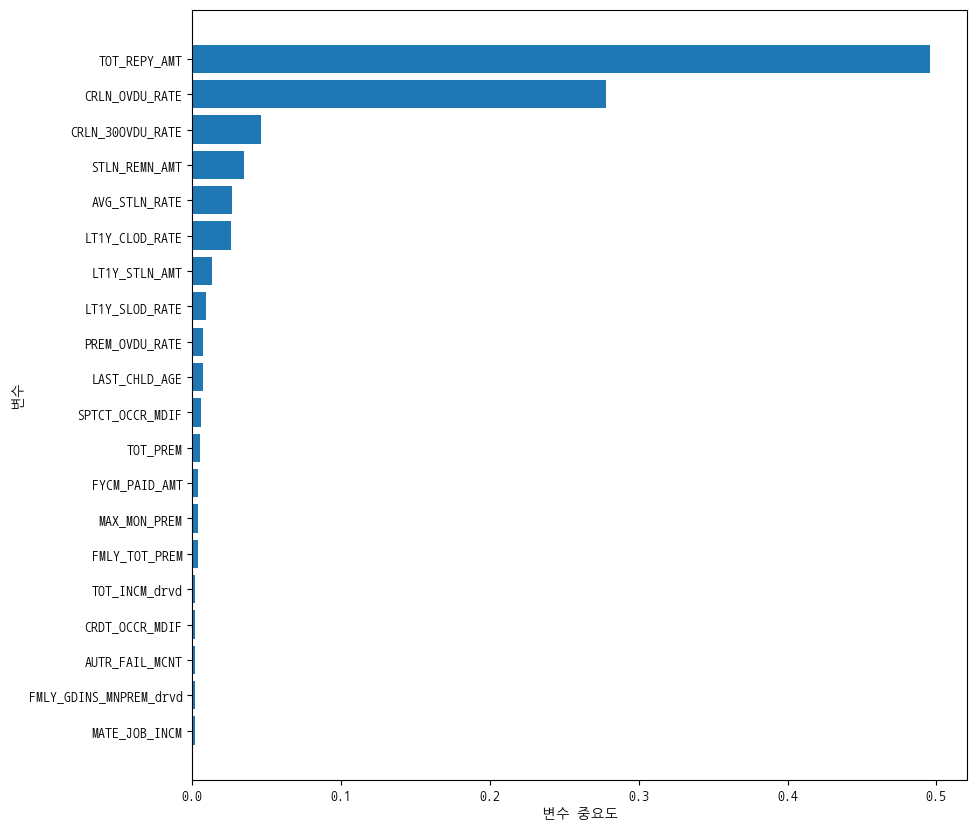

In [447]:
plt.figure(figsize=(10, 10))
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [448]:
# 모델 선언 예시
un_xgb = XGBClassifier(random_state=11)

In [449]:
un_xgb.fit(df_train_x,df_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=11, ...)

In [450]:
print("Score on training set:{:.3f}".format(un_xgb.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(un_xgb.score(df_test_x,df_test_y)))

Score on training set:0.995
Score on test set:0.987


In [451]:
xgb_param_grid={
    'n_estimators' : [100,200,300,400],
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [3,5,7,10],
    'gamma' : [0,1,2,3],
    'colsample_bytree' : [0.8,0.9],
    
}

In [452]:
#grid_xgb = GridSearchCV(un_xgb, xgb_param_grid, cv =3 , n_jobs = -1)
#grid_xgb.fit(df_train_x,df_train_y)

In [453]:
#print("best model: \n{}".format(grid_xgb.best_estimator_))
#print("\nbest parameter: \n{}".format(grid_xgb.best_params_))
#print("\nbest score: \n{}".format(grid_xgb.best_score_.round(3)))
#print("\nbest set score: \n{}".format(grid_xgb.score(df_test_x,df_test_y).round(3)))

In [454]:
final_xgb= XGBClassifier(colsample_bytree=0.9,gamma=1,learning_rate=0.1,max_depth=5,n_estimators=200,random_state=11)
final_xgb.fit(df_train_x,df_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=11, ...)

In [455]:
y_pred = final_xgb.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(final_xgb.score(df_test_x,df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy:0.987

Confusion matrix: 
[[27371    89]
 [  284  1921]]
              precision    recall  f1-score   support

           0      0.990     0.997     0.993     27460
           1      0.956     0.871     0.912      2205

    accuracy                          0.987     29665
   macro avg      0.973     0.934     0.952     29665
weighted avg      0.987     0.987     0.987     29665



In [456]:
get_classifier_eval(df_test_y, y_pred)

오차 행렬
[[27371    89]
 [  284  1921]]
정확도: 0.9874, 정밀도: 0.9557, 재현율: 0.8712
f1-score: 0.9115


In [457]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = final_xgb.feature_importances_

df_importance.sort_values("Importance",ascending=False, inplace=True)
df_importance=df_importance.round(3).head(20)
df_importance

,Feature,Importance
10,TOT_REPY_AMT,0.319
11,CRLN_OVDU_RATE,0.083
15,AVG_STLN_RATE,0.045
13,LT1Y_CLOD_RATE,0.031
16,STLN_REMN_AMT,0.027
26,FMLY_GDINS_MNPREM_drvd,0.011
121,CNTT_LAMT_CNT_2,0.010
89,OCCP_NAME_G_사무직,0.009
96,OCCP_NAME_G_학생,0.008
28,TARGET_0,0.008


Text(0, 0.5, '변수')

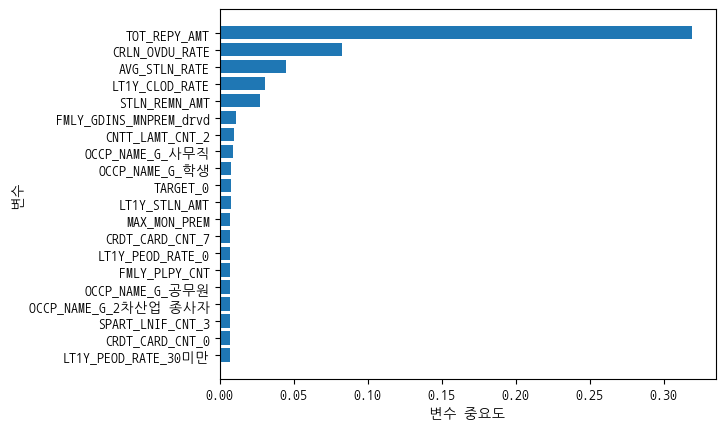

In [458]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [459]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.934
Accuracy on test set: 0.924


In [460]:
grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [461]:
#grid_knn = GridSearchCV(knn_uncustomized, grid_params, cv =3 , n_jobs = -1)
#grid_knn.fit(df_train_x,df_train_y)

In [462]:
#print("best model: \n{}".format(grid_knn.best_estimator_))
#print("\nbest parameter: \n{}".format(grid_knn.best_params_))
#print("\nbest score: \n{}".format(grid_knn.best_score_.round(3)))
#print("\nbest set score: \n{}".format(grid_knn.score(df_test_x,df_test_y).round(3)))

In [463]:
final_knn =KNeighborsClassifier(metric= 'manhattan',n_neighbors=4,weights='uniform')
final_knn.fit(df_train_x,df_train_y)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [464]:
y_pred = final_knn.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(final_knn.score(df_test_x,df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy:0.926

Confusion matrix: 
[[27431    29]
 [ 2167    38]]
              precision    recall  f1-score   support

           0      0.927     0.999     0.962     27460
           1      0.567     0.017     0.033      2205

    accuracy                          0.926     29665
   macro avg      0.747     0.508     0.497     29665
weighted avg      0.900     0.926     0.893     29665



In [465]:
get_classifier_eval(df_test_y, y_pred)

오차 행렬
[[27431    29]
 [ 2167    38]]
정확도: 0.9260, 정밀도: 0.5672, 재현율: 0.0172
f1-score: 0.0335


In [466]:
dt = DecisionTreeClassifier(random_state=11)
dt.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(dt.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(dt.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.975


In [467]:
final_dt = DecisionTreeClassifier(max_depth=5,min_samples_leaf=8,min_samples_split=16,random_state=11)
final_dt.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, min_samples_split=16,
                       random_state=11)

In [468]:
y_pred = final_dt.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(final_dt.score(df_test_x,df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy:0.987

Confusion matrix: 
[[27362    98]
 [  273  1932]]
              precision    recall  f1-score   support

           0      0.990     0.996     0.993     27460
           1      0.952     0.876     0.912      2205

    accuracy                          0.987     29665
   macro avg      0.971     0.936     0.953     29665
weighted avg      0.987     0.987     0.987     29665



In [469]:
from lightgbm import LGBMClassifier

In [470]:
lgbm = LGBMClassifier(n_estimators=1000)
lgbm.fit(df_train_x, df_train_y)

y_pred = lgbm.predict(df_test_x)

In [471]:
get_classifier_eval(df_test_y, y_pred)

오차 행렬
[[27379    81]
 [  296  1909]]
정확도: 0.9873, 정밀도: 0.9593, 재현율: 0.8658
f1-score: 0.9101


In [472]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = lgbm.feature_importances_

df_importance.sort_values("Importance",ascending=False, inplace=True)
df_importance=df_importance.round(3).head(20)
df_importance

,Feature,Importance
25,TOT_INCM_drvd,1819
10,TOT_REPY_AMT,1578
23,FYCM_PAID_AMT,1447
19,MAX_MON_PREM,1361
14,PREM_OVDU_RATE,1358
0,TOT_LNIF_AMT,1322
15,AVG_STLN_RATE,1278
21,FMLY_TOT_PREM,1247
20,TOT_PREM,1156
26,FMLY_GDINS_MNPREM_drvd,1135


Text(0, 0.5, '변수')

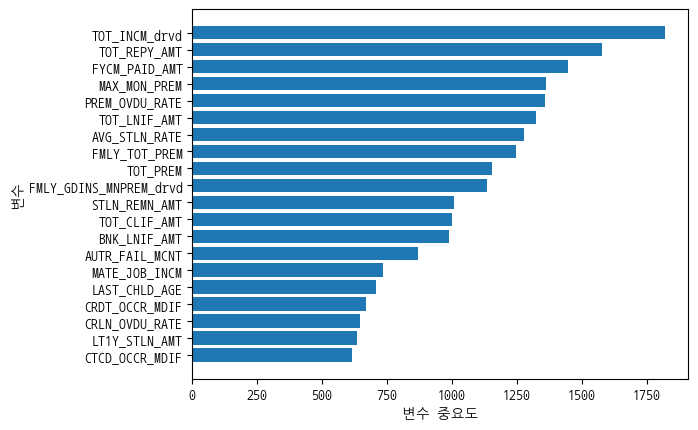

In [473]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")